In [1]:
import os
os.chdir('/Users/gongwenxi/Desktop/kaggle/credit-card-fraud')

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 200 # set pixel

In [2]:
df_data = pd.read_csv('creditcard.csv')
df_data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
print('the shape of data is',df_data.shape)
df_data.describe().T

the shape of data is (284807, 31)


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
#check the null value
df_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5,1,'The amount of observation in different class')

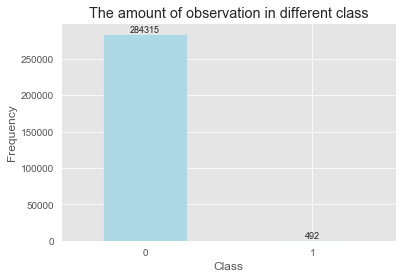

In [5]:
# As general, the dataset of the detection of the credit card fraud is unbalanced
# Let‘s use a bar plot to check this dataset
df_target = pd.value_counts(df_data['Class'])

plt.figure(figsize= (6,4))
df_target.plot('bar',color = 'lightblue')
for i in range(2):
    plt.text(i,df_target[i]+10,'%.0f' % df_target[i], ha='center', va= 'bottom',fontsize=9)
plt.xticks(rotation = 360)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('The amount of observation in different class')

We notice that our dataset is very **highly asymmetry**. It means that accuracy metrics doesn't do well in this model evaluation.

For example, if we just predict that all target will be Class 0, we will still get a high accuracy nearly approaching  $0.998$ . BUT WE WOULD BE CLASSIFYING ALL "1" INCORRECTLY here !! 

In CS109, Several evaluation methods for solving unbalanced data sets are exemplified.
* Collect more data Nice strategy but not applicable in this case
* Changing the performance metric:
    * Use the confusio nmatrix to calculate **Precision, Recall**
    * **F1 score** (weighted average of precision recall)
    * Use **Kappa** - which is a classification accuracy normalized by the imbalance of the classes in the data
    * **ROC curves** - calculates sensitivity/specificity ratio.
* Resampling the dataset
    * **Over-sampling**, adds copies of the under-represented class (better when you have little data)
    * **Under-sampling**, deletes instances from the over-represented class (better when he have lot's of data)
    * **Combination of over- and under-sampling methods**
    
    https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis


In [6]:
# feature engineering
df_data['Hour'] =df_data["Time"].apply(lambda x : divmod(x, 3600)[0]) 

In [7]:
# View the difference between normal credit card users and fraudulent users
df_fraud = df_data.loc[df_data['Class'] == 1]
df_nofraud = df_data.loc[df_data['Class'] == 0]

Text(0.5,1,'Heatmap of category: Fraud')

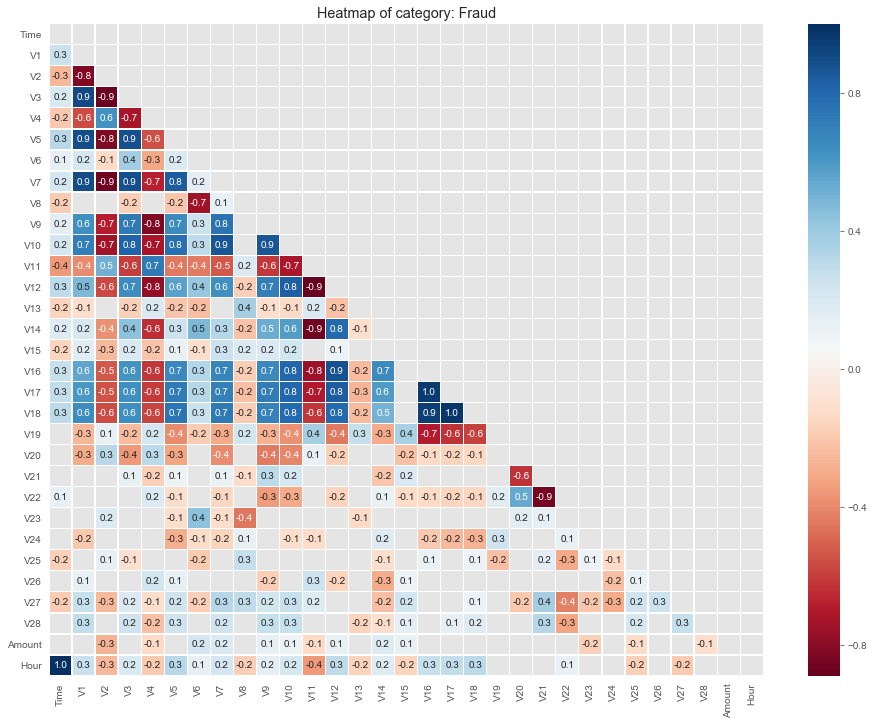

In [8]:
corr1 = df_fraud.loc[:,df_fraud.columns != "Class"].corr()
cover = np.ones((corr1.shape))
cover = np.triu(cover) > 0
plt.figure(figsize = (16,12))
sns.heatmap(corr1, xticklabels = df_fraud.columns[df_fraud.columns != 'Class'], annot = True, linewidths= .2,
           fmt = '.1f',mask = ((corr1 > -.1)&(corr1 < .1) | cover), cmap = 'RdBu')
plt.title('Heatmap of category: Fraud')

Text(0.5,1,'Heatmap of category: NoFraud')

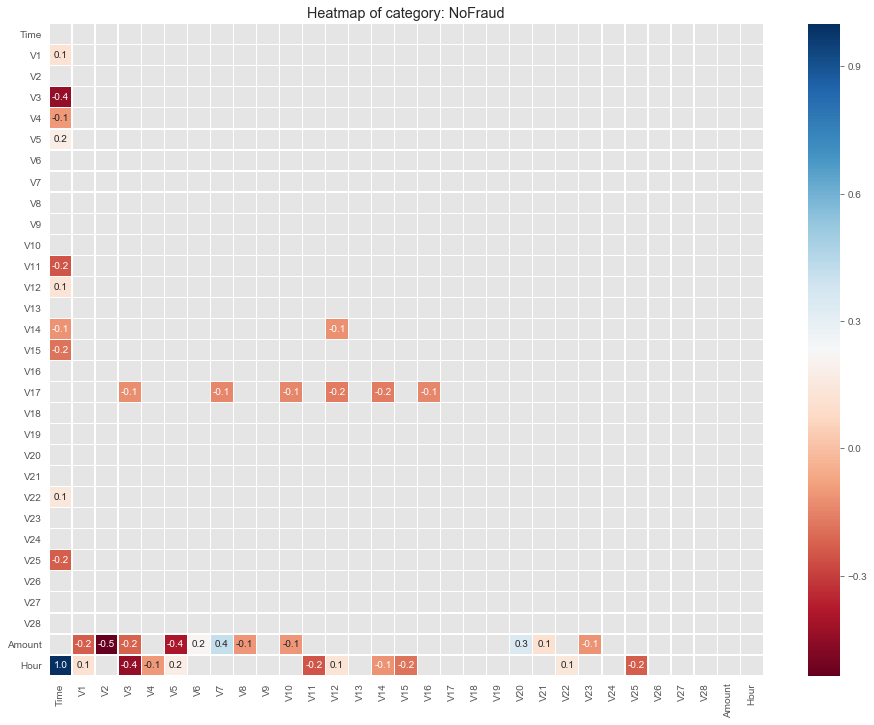

In [9]:
corr2 = df_nofraud.loc[:,df_nofraud.columns != "Class"].corr()
plt.figure(figsize = (16,12))
cover = np.ones((corr1.shape))
cover = np.triu(cover) > 0
sns.heatmap(corr2, xticklabels = df_nofraud.columns[df_nofraud.columns != 'Class'], annot = True, linewidths= .2,
            fmt = '.1f',mask = ((-.1< corr2) & (corr2< .1) | cover), cmap = 'RdBu')
plt.title('Heatmap of category: NoFraud')

In the above heatmap, we have dropped some value of the features with a correlation coefficient between 0.1 and -0.1 which means that they have poor correlation.

We can see some difference between the Fraud and NoFraud. In the Fraud class, the correlation between some variables is more obvious.The variation between the variables V1, V2, V3, V4, V5, V6, V7, V9, V10, V11, V12, V14, V16, V17 and V18 is a certain regularity in the sample of the credit card stolen.

Text(0,0.5,'Number of Transactions')

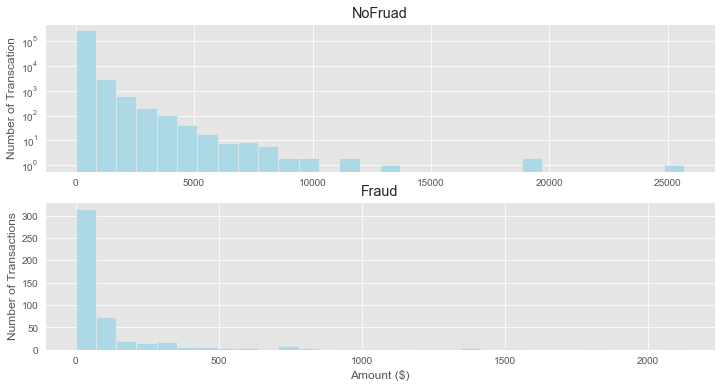

In [10]:
fig = plt.figure(figsize = (12,6))

plt.subplot(211)
plt.hist(df_data['Amount'][df_data['Class'] == 0],bins = 30, color = 'lightblue')
plt.title('NoFruad')
plt.yscale('log')
plt.ylabel('Number of Transcation')

plt.subplot(212)
plt.hist(df_data['Amount'][df_data['Class'] == 1], bins = 30, color = 'lightblue')
plt.title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

There is obvious deference between Fraud and NoFraud. The money spent by Fraud class is right skewed and the money spent by NoFraud class is more widely distributed. This means that the credit card thief is more inclined to choose a small amount of money in order not to attract the attention of the credit card owner.

Text(0.5,0,'Time (in Hours)')

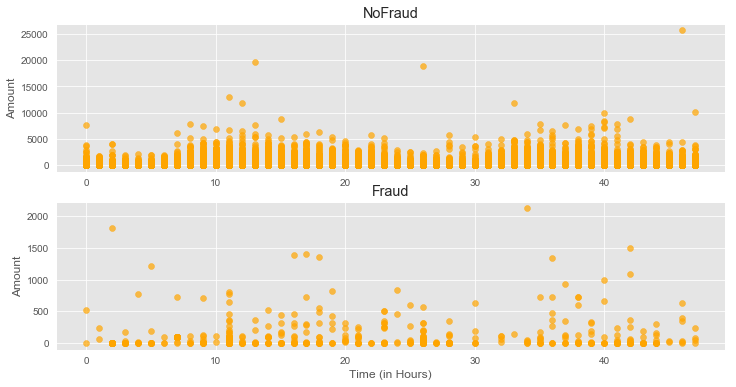

In [11]:
fig = plt.figure(figsize= (12,6))

plt.subplot(211)
plt.scatter(df_data['Hour'][df_data['Class'] == 0], df_data['Amount'][df_data['Class'] == 0], color = 'orange', marker = 'o',alpha= .7)
plt.title('NoFraud')
plt.ylabel('Amount')

plt.subplot(212)
plt.scatter(df_data['Hour'][df_data['Class'] == 1], df_data['Amount'][df_data['Class'] == 1], color = 'orange', alpha = .7)
plt.title('Fraud')
plt.ylabel('Amount')

plt.xlabel('Time (in Hours)')

In [12]:
print('NoFraud Amount summary')
print(df_data['Amount'][df_data['Class'] == 0].describe())
print('*'*50)
print('Fraud Amount summary')
print(df_data['Amount'][df_data['Class'] == 1].describe())

NoFraud Amount summary
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
**************************************************
Fraud Amount summary
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


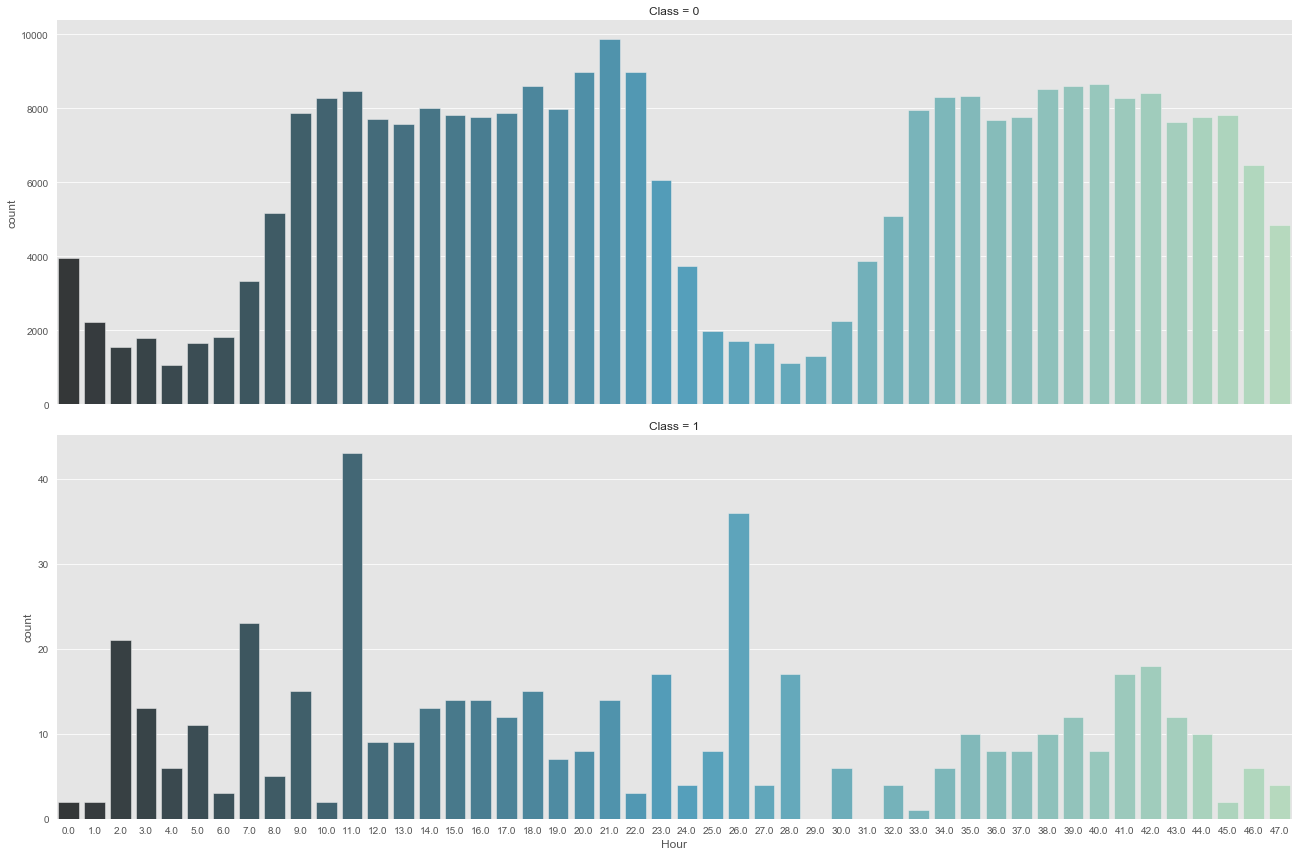

In [13]:
sns.catplot(x="Hour", data=df_data, kind="count",  col = 'Class', palette="GnBu_d", 
            height=6, aspect=3, sharey= False, orient = "h", col_wrap = 1)

As can be seen from the above figures, In Fraud class the outliers occur during the period when the customer uses the credit card for a low frequency. The highest number of the case reaches 43 times at 11:00 am on the first day. The rest of the credit card case is happened between 11:00 pm and 9:00 am, indicating that the credit card thieves try not to cause the credit card owners' attention. They prefer to take action during the sleeping time and when the frequency of consumption is higher. At the same time, the maximum stolen money is only 2,125.87 US dollars.

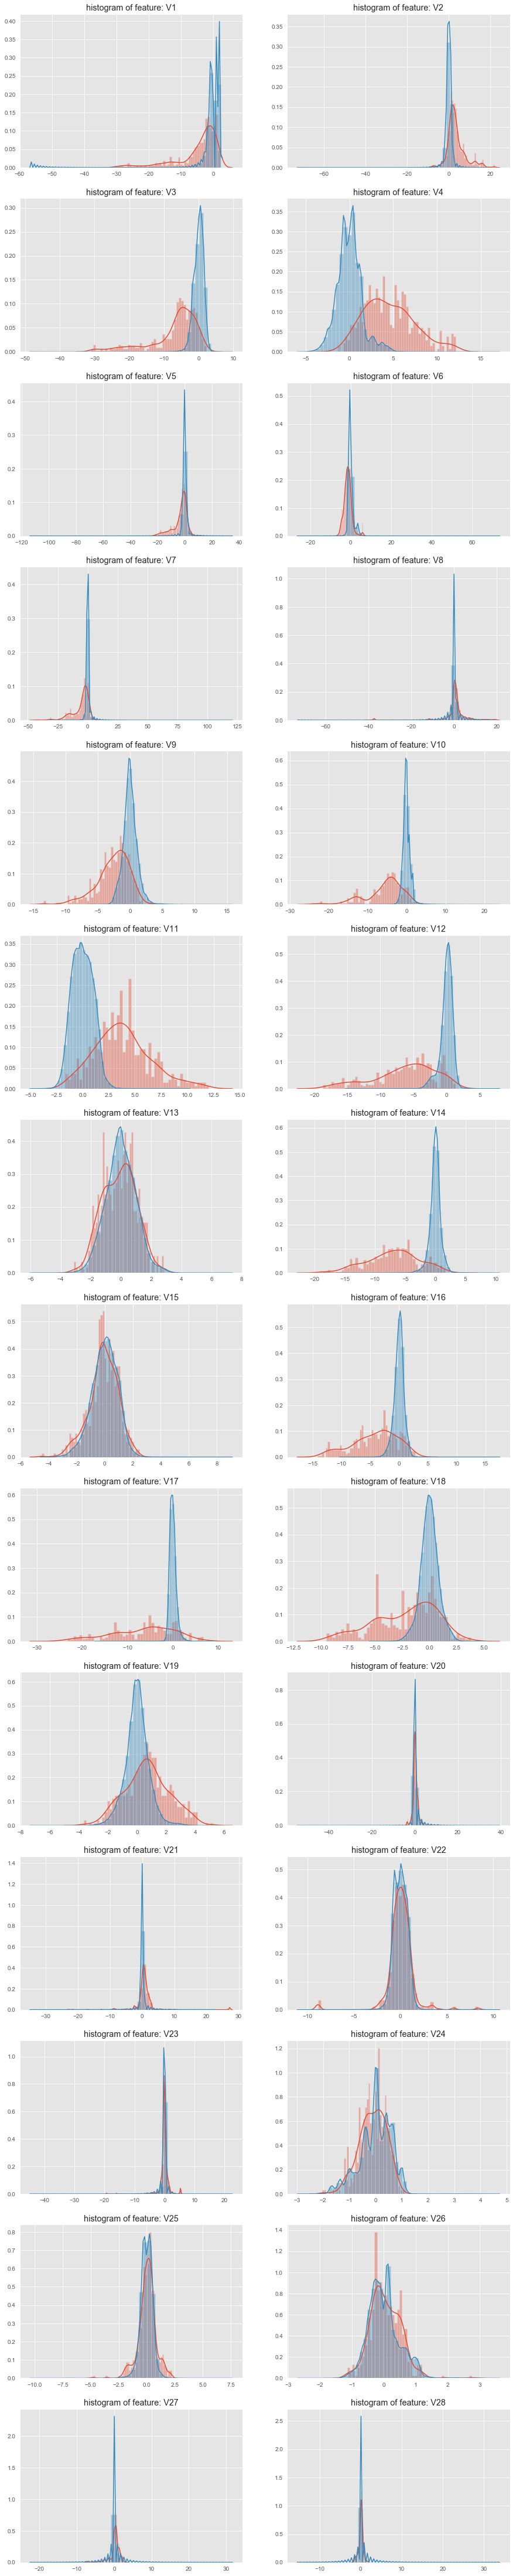

In [14]:
show_feature = df_data.iloc[:,1:-3].columns

plt.figure(figsize=(15,20*4))
for i, cn in enumerate(df_data[show_feature]):
    ax = plt.subplot(14,2,i+1)
    sns.distplot(df_data[cn][df_data["Class"] == 1], bins=50)
    sns.distplot(df_data[cn][df_data["Class"] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

In [15]:
#Drop all of the features that have very similar distributions between the two types of transactions.
df_data = df_data.drop(['V28','V27','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)
print('After dropping the useless features, the shape of data set is ',df_data.shape)

After dropping the useless features, the shape of data set is  (284807, 22)


In [16]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
#df_data['scaled_hour'] = RS.fit_transform(df_data['Hour'].values.reshape(-1,1))
df_data['scaled_amount'] = RS.fit_transform(df_data['Amount'].values.reshape(-1,1))

df_data.drop(['Time','Hour','Amount'], axis = 1, inplace= True)
df_data.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,V26,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,-0.189115,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0.125895,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,-0.139097,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,-0.221929,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0.502292,0,0.670579


In [17]:
#splitting the data
print('NoFraud', round(df_data['Class'].value_counts()[0] / len(df_data) * 100,2), '% of the dataset')
print('Fraud', round(df_data['Class'].value_counts()[1] / len(df_data) * 100,2), '% of the dataset')
print('*'*100)

from sklearn.model_selection import StratifiedShuffleSplit
SSS = StratifiedShuffleSplit(random_state= 42, test_size= .3, n_splits= 5)

df_train = df_data.drop(['Class'], axis = 1)
df_label = df_data['Class']

for train_index, test_index in SSS.split(df_train,df_label):
    print('Train index :',train_index, 'Test index :',test_index)
    X_train, X_test= df_train.iloc[train_index], df_train.iloc[test_index]
    y_train, y_test = df_label.iloc[train_index], df_label.iloc[test_index]

print('*'*100)
print('After the splitting, the percent of Fraud is in train: %.2f %%'% ((len(y_train[y_train == 1]) / len(y_train)) * 100))
print('After the splitting, the percent of Fraud is in test: %.2f %%'%((len(y_test[y_test == 1]) / len(y_test)) * 100))

NoFraud 99.83 % of the dataset
Fraud 0.17 % of the dataset
****************************************************************************************************
Train index : [249927 214082 106005 ...  85418  29062  17677] Test index : [186882 165754 235285 ... 183868  45011 150527]
Train index : [276195 192099 115845 ...  22637 262569  34099] Test index : [ 33747 281511 259163 ... 264829    909 284263]
Train index : [155465 138637 188941 ... 179424 103729 126678] Test index : [  2425  61087  45793 ...  80971 138280  10302]
Train index : [198423 137377 273445 ... 199414 212912  78058] Test index : [263142 258439 156510 ... 173872 236218 243659]
Train index : [267548 208598 228302 ... 277684 135729 144198] Test index : [130522 131966 248715 ... 166658 209383  29268]
****************************************************************************************************
After the splitting, the percent of Fraud is in train: 0.17 %
After the splitting, the percent of Fraud is in test: 0.17 %


In [18]:
# firstly we don't tackle with the imbalanced data set
# we create the LogisticRegression model
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state= 42)

LR_clf.fit(X_train,y_train)
LR_predict = LR_clf.predict(X_test)

In [19]:
from sklearn.model_selection import cross_val_score
print('*'*50)
LR_score = cross_val_score(LR_clf,X_train,y_train,cv = 5,scoring='roc_auc')
print('LogisticRegression:the mean score of cross validation is:{0:.4f}'.format(LR_score.mean()))

**************************************************
LogisticRegression:the mean score of cross validation is:0.9707


In [20]:
from sklearn.metrics import confusion_matrix
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('*'*100)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize = 14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.6081081081081081
Precision metric in the testing dataset:  0.8823529411764706
****************************************************************************************************
****************************************************************************************************
Confusion matrix, without normalization
[[85283    12]
 [   58    90]]


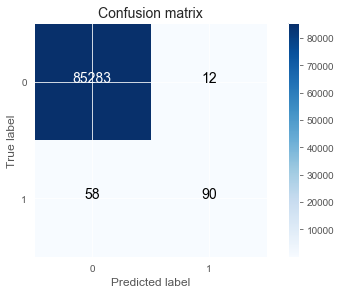

In [21]:
# Compute confusion matrix
LR_matrix = confusion_matrix(y_test, LR_predict)  
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", LR_matrix[1,1]/(LR_matrix[1,0]+LR_matrix[1,1]))
print('Precision metric in the testing dataset: ', LR_matrix[1,1]/(LR_matrix[0,1]+LR_matrix[1,1]))
print('*'*100)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(LR_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

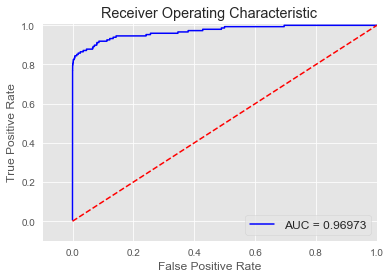

In [22]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score
LR_predict_prob = LR_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, LR_predict_prob[:,1])
auc = roc_auc_score(y_test, LR_predict_prob[:,1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% auc)
plt.legend(loc='best',fontsize = 12)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
# tunning the Logistic model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.01, .1, 1, 10, 100, 1000],
             'penalty': ['l1','l2']}
LR_tuning = GridSearchCV(LR_clf, param_grid, cv = 5, scoring= 'recall')
LR_tuning.fit(X_train,y_train)
print(LR_tuning.best_estimator_)
print('the best score after tuning paraameters:',LR_tuning.best_score_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
the best score after tuning paraameters: 0.6219525020511518


Recall metric in the testing dataset:  0.6081081081081081
Precision metric in the testing dataset:  0.8823529411764706
****************************************************************************************************
****************************************************************************************************
Confusion matrix, without normalization
[[85283    12]
 [   58    90]]


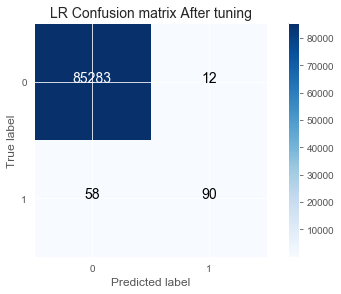

In [24]:
LR_tuning_pred = LR_tuning.best_estimator_.predict(X_test)

LR_tuning_matrix = confusion_matrix(y_test, LR_tuning_pred)  
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", LR_tuning_matrix[1,1]/(LR_tuning_matrix[1,0]+LR_tuning_matrix[1,1]))
print("Precision metric in the testing dataset: ", LR_tuning_matrix[1,1]/(LR_tuning_matrix[0,1]+LR_tuning_matrix[1,1]))
print('*'*100)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(LR_tuning_matrix
                      , classes=class_names
                      , title='LR Confusion matrix After tuning')
plt.show()

**Regetfully,There is nothing improvement after tuning the parameters.**

### Over-sampling
Now, we try to use resampling to create a balanced dataset. We only use partial data (training set) to avoid add too much uncerterinty in model.

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio = 'minority', random_state = 42, )

ovr_train, ovr_label = smote.fit_sample(X_train,y_train)

n_Fraud = ovr_label[ovr_label == 1].shape[0]
n_NoFraud = ovr_label[ovr_label == 0].shape[0]

print('After over-sampling the number of NoFraud is {0: }, \n After over-sampling the number of Fraud is {1: }'.format(n_NoFraud,n_Fraud))

After over-sampling the number of NoFraud is  199020, 
 After over-sampling the number of Fraud is  199020


In [26]:
# train the LogisticRegression model after over-sampling
from sklearn.model_selection import train_test_split
ovr_X_train, ovr_X_test, ovr_y_train, ovr_y_test = train_test_split(ovr_train, ovr_label, test_size = .3, random_state = 42)

LR_clf_ovr = LogisticRegression(random_state= 42)
LR_clf_ovr.fit(ovr_X_train, ovr_y_train)

print('*'*50)
LR_ovr_score = cross_val_score(LR_clf_ovr, ovr_X_train, ovr_y_train, cv = 5, scoring='roc_auc')
print('After over-sampling,LogisticRegression:the mean score of cross validation is:{0:.4f}'.format(LR_ovr_score.mean()))

**************************************************
After over-sampling,LogisticRegression:the mean score of cross validation is:0.9884


Recall metric in the testing dataset:  0.8783783783783784
Precision metric in the testing dataset:  0.05800981704596162
****************************************************************************************************
****************************************************************************************************
Confusion matrix, without normalization
[[83184  2111]
 [   18   130]]


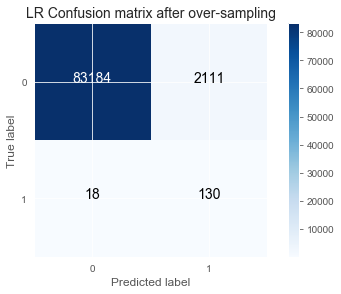

In [27]:
predict_ovr_LR = LR_clf_ovr.predict(X_test)
LR_ovr_matrix = confusion_matrix(y_test, predict_ovr_LR)

np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", LR_ovr_matrix[1,1]/(LR_ovr_matrix[1,0]+LR_ovr_matrix[1,1]))
print("Precision metric in the testing dataset: ", LR_ovr_matrix[1,1]/(LR_ovr_matrix[0,1]+LR_ovr_matrix[1,1]))
print('*'*100)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(LR_ovr_matrix
                      , classes=class_names
                      , title='LR Confusion matrix after over-sampling')
plt.show()

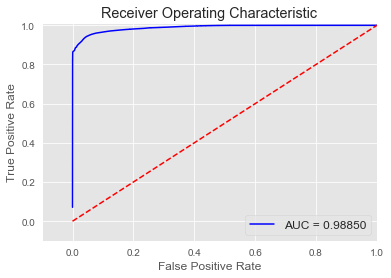

In [28]:
predict_ovr_proba = LR_clf_ovr.predict_proba(ovr_X_test)
fpr, tpr, threshold = roc_curve(ovr_y_test, predict_ovr_proba[:,1])

auc = roc_auc_score(ovr_y_test, predict_ovr_proba[:,1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% auc)
plt.legend(loc='best',fontsize = 12)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
# After over-sampling, tunning the Logistic model again
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.01, .1, 1, 10, 100, 1000],
             'penalty': ['l1','l2']}
LR_ovr_tuning = GridSearchCV(LR_clf_ovr, param_grid, cv = 5,scoring='recall')
LR_ovr_tuning.fit(ovr_X_train, ovr_y_train)

print(LR_ovr_tuning.best_estimator_)
print('the best score after tuning parameters:',LR_ovr_tuning.best_score_)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
the best score after tuning parameters: 0.9095709434997863


After over-sampling and tuning , the Recall of test set is 0.87838
After over-sampling and tuning , the Precision of test set is 0.05796
****************************************************************************************************
Confusion matrix, without normalization
[[83182  2113]
 [   18   130]]


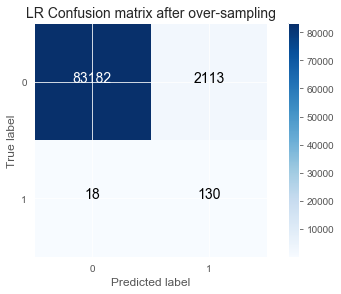

In [30]:
predict_LR_ovr_tuning = LR_ovr_tuning.best_estimator_.predict(X_test)

LR_ovr_tuning_matrix = confusion_matrix(y_test, predict_LR_ovr_tuning)

print('After over-sampling and tuning , the Recall of test set is {:.5f}'.format(LR_ovr_tuning_matrix[1,1] / (LR_ovr_tuning_matrix[1,0] + LR_ovr_tuning_matrix[1,1])))
print('After over-sampling and tuning , the Precision of test set is {:.5f}'.format(LR_ovr_tuning_matrix[1,1] / (LR_ovr_tuning_matrix[0,1] + LR_ovr_tuning_matrix[1,1])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(LR_ovr_tuning_matrix
                      , classes=class_names
                      , title='LR Confusion matrix after over-sampling')
plt.show()

In CS109, it presents that how a cost matrix affects the model selection between the metrics **Recall and Precision**. It does exist a trade off between the two metrics. We change the thresholds to achieve a balance between Recall and Precision.

****************************************************************************************************
Threshold :  0.1
Recall metric in the testing dataset:  0.9527027027027027
****************************************************************************************************
Confusion matrix, without normalization
[[66957 18338]
 [    7   141]]
****************************************************************************************************
Threshold :  0.2
Recall metric in the testing dataset:  0.9256756756756757
****************************************************************************************************
Confusion matrix, without normalization
[[77930  7365]
 [   11   137]]
****************************************************************************************************
Threshold :  0.3
Recall metric in the testing dataset:  0.8918918918918919
****************************************************************************************************
Confusion matrix, without n

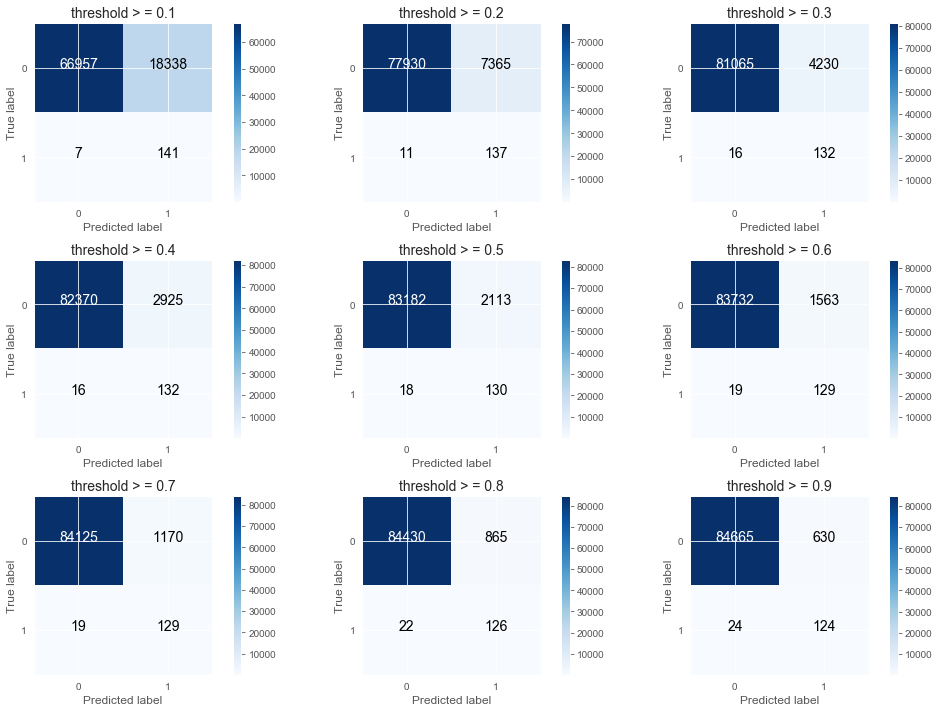

In [31]:
y_pred_proba = LR_ovr_tuning.best_estimator_.predict_proba(X_test)  

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i#预测出来的概率值是否大于阈值 
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print('*'*100)
    print('Threshold : ',i)
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, 
                          classes=class_names,
                          title = 'threshold > = %s'% i)
                          

Some algorithms have inner paramters to adjust the imbalanced data set,like the `class_weight` in svm , randomforest, .etc.

In [32]:
# We use the inner parameters to try to eliminate the effect of unbalanced data
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42, class_weight= 'balanced_subsample')
forest_clf.fit(X_train, y_train)
forest_predict = forest_clf.predict(X_test)

forest_matrix = confusion_matrix(y_test, forest_predict)
print('the confusion matrix of RandomForest \n', forest_matrix)
print('*'*100)
print('the recall of RandomForest without using Over/Under-sampling is {:.5f}'.format(forest_matrix[1,1] / (forest_matrix[1,0] + forest_matrix[1,1])))
print('the prescion of RandomForest without using Over/Under-sampling is {:.5f}'.format(forest_matrix[1,1] / (forest_matrix[0,1] + forest_matrix[1,1])))

the confusion matrix of RandomForest 
 [[85290     5]
 [   51    97]]
****************************************************************************************************
the recall of RandomForest without using Over/Under-sampling is 0.65541
the prescion of RandomForest without using Over/Under-sampling is 0.95098


In [33]:
# We use the inner parameters to try to eliminate the effect of unbalanced data

forest_clf_ovr = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1)
forest_clf_ovr.fit(ovr_X_train, ovr_y_train)
forest_predict_ovr = forest_clf_ovr.predict(X_test)

forest_matrix_ovr = confusion_matrix(y_test, forest_predict_ovr)
print('the confusion matrix of RandomForest \n', forest_matrix_ovr)
print('*'*100)
print('the recall of RandomForest  using Over/Under-sampling is {:.5f}'.format(forest_matrix_ovr[1,1] / (forest_matrix_ovr[1,0] + forest_matrix_ovr[1,1])))
print('the prescion of RandomForest  using Over/Under-sampling is {:.5f}'.format(forest_matrix_ovr[1,1] / (forest_matrix_ovr[0,1] + forest_matrix_ovr[1,1])))

the confusion matrix of RandomForest 
 [[85272    23]
 [   32   116]]
****************************************************************************************************
the recall of RandomForest  using Over/Under-sampling is 0.78378
the prescion of RandomForest  using Over/Under-sampling is 0.83453


In [34]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state = 42)

param_grid = {
    'n_estimators':[50,100,150,200,300]
}
ada_res = GridSearchCV(ada, param_grid, scoring = 'recall', cv = 5, n_jobs = -1)
ada_res.fit(ovr_X_train, ovr_y_train)
ada_res_predict = ada_res.best_estimator_.predict(X_test)

ada_matrix_res = confusion_matrix(y_test, ada_res_predict)
print(ada_res.best_params_)
print('the confusion matrix of Randomada \n', ada_matrix_res)
print('*'*100)
print('the recall of Adaboost using Over/Under-sampling is {:.5f}'.format(ada_matrix_res[1,1] / (ada_matrix_res[1,0] + ada_matrix_res[1,1])))
print('the prescion of Adaboost using Over/Under-sampling is {:.5f}'.format(ada_matrix_res[1,1] / (ada_matrix_res[0,1] + ada_matrix_res[1,1])))

{'n_estimators': 300}
the confusion matrix of Randomada 
 [[84134  1161]
 [   18   130]]
****************************************************************************************************
the recall of Adaboost using Over/Under-sampling is 0.87838
the prescion of Adaboost using Over/Under-sampling is 0.10070


We use AdaBoost to achieve the same Recall as using LogisticRegression and improve the Precision a little bit.

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
svm = SVC(kernel = 'rbf', class_weight= 'balanced', C = 1.6, gamma = .0003)

svm.fit(ovr_X_train, ovr_y_train)
predict_svm = svm.predict(X_test)
print('f1 score using smote sampling',f1_score(y_test , predict_svm))
print('Recall using somte sampling', recall_score(y_test, predict_svm))
print('Precision using smote sampling', precision_score(y_test, predict_svm))

f1 score using smote sampling 0.16539440203562342
Recall using somte sampling 0.8783783783783784
Precision using smote sampling 0.09129213483146068


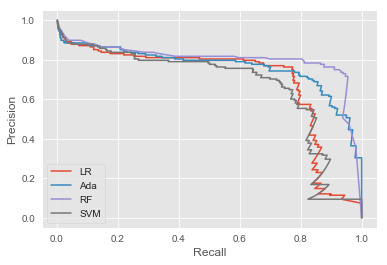

In [86]:

from sklearn.metrics import precision_recall_curve
lr_score = LR_ovr_tuning.predict_proba(X_test)[:,1]
ada_score = ada_res.best_estimator_.predict_proba(X_test)[:,1]
forest_score = forest_clf_ovr.predict_proba(X_test)[:,1]
svm_score = svm.decision_function(X_test)
score_list = list((lr_score,ada_score,forest_score,svm_score))
colors = ['r','y','b','g']
labels = ['LR','Ada','RF','SVM']

for score, color, label in zip(score_list, colors, labels):
    precision, recall, _ = precision_recall_curve(y_test, score)
    plt.plot(precision, recall,  label = label)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')